# Introduction

Cars are an enormous part of day to day life. The average lifespan of a personal vehicle is 10-15 years, though many factors often cause people to buy new vehicles more frequently, whether it be car accidents, mistreatment of machine parts, or just wanting something new. A new vehicle today costs an average of $48,000, growing over 50% from just 10 years ago at $30,000. Vehicles are seen by many as a necessity, but the rapidly growing price means many more today look for used cars or large sales. Car manufacturers and dealerships have to find the right balance of affordable and modern when selling cars, so it often helps to know what an individual's maximum budget on these purchases are. This analysis seeks to answer the question: "What factors have the strongest effect on a car budget?" To answer this question, we will examine customer factors that can impact their finacial decisions around vehicles, such as a customer's age, gender, salary, as well as debts.

This analysis features a Linear Regression model. A linear regression model attempts to find the best linear relationship between factor variables and a target variable, which allows us to then predict the value of the target variable, given the factor variables. This analysis uses a supervised model, meaning it is trained with data that includes the values of the factor variables, also known as features, as well as the value of the target variable. This lets the model learn to correlate certain patterns in the features with specific value ranges in the target. By the end of the training, the model creates an equation which is then used when predicting new entries. The equation looks like this: 

<b>y = a + b1x1 + b2x2 + b3x3...</b>

'y' is the predicted value of the target<br>
'a' is a constant value. This is what the target value would be if all other features were 0.<br>
'b1x1' is two values multiplied. 'b1' represents the coefficient of the first column. This coefficient can be interpretted like the column's weight. The larger this value, the more dramatic a change each time the value of this column increases. 'x1' represents the value in the data entry for this particular column.

Each column has its own 'b' and 'x' variables and the equation ends when there are no more features to consider. Lets take a look at an example:

A teacher wants to predict the grades of her students based on how long they spent studying and what study method they used. After modeling the data, she found the linear regression equation to be:

<b>y = 50 + 5x1 + 3x2 - 1x3</b>

In this equation, we can see that 'a' has a value of 50, meaning if a student spends no time studying, they are predicted to earn a score of 50. 'b1x1' is represented as '5x1', meaning that for every hour of studying using method 1, a student should earn 5 additional points. 'b2x2' is represented as '3x2', meaning that every hour of study using method 2 should earn a student 3 additional points. Finally, 'b3x3' is represented as '-1x3' meaning every hour of study using method 3 will lose a student 1 point (that's not good!). Now if we wanted to predict what a student will earn after studying 3 hours using method 1, 2 hours using method 2, and 4 hours using method 3, we can plug these numbers into our equation and calculate the predicted score to be: 67 = 50 + 5(3) + 3(2) - 1(4)

This is a simplified version of what our model will do.

# The Data

Our data comes from the ["Car Purchasing Model"](https://www.kaggle.com/datasets/dev0914sharma/car-purchasing-model) on kaggle, collected by Dev Sharma. This data consists of 500 entries across 9 features. These features include:
1. <b>Customer Name</b> - the name of the individual
2. <b>Customer e-mail</b> - the email of the individual
3. <b>Country</b> - the country of residence of the individual
4. <b>Gender</b> - the gender of the individual
5. <b>Age</b> - the age of the individual
6. <b>Annual Salary</b> - the annual salary of the individual in USD
7. <b>Credit Card Debt</b> - the credit card debt of the individual in USD
8. <b>Net Worth</b> - the net worth of the individual
9. <b>Car Purchase Amount</b> - the amount of money the individual is willing to pay for a new car<br>

Of the variables, <b>Customer Name</b> and <b>Customer e-mail</b> are identifying variables and therefore aren't meant to be used as predictors. The <b>Country</b> variable only holds one unique value, that being "USA", therefore this variable is irrelevant to models. <b>Gender</b> is the only boolean variable, though it is represented numerically along with the rest of the features, including our target variable <b>Car Purchase Amount</b>. We can observe below that the target variable ranges from 9,000 to 80,0000 with the average being roughly 44,000.

In [2]:
import pandas as pd

In [3]:
# Import dataset into a Pandas dataframe
df = pd.read_csv('Car_Purchasing_Data.csv')

# View dataset
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
# Dataset dimensions
df.shape

(500, 9)

In [5]:
# Data types
df.dtypes

Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object

In [6]:
# Print summary statistics
print(f'Minimum: {df['Car Purchase Amount'].min()}')
print(f'Maximum: {df['Car Purchase Amount'].max()}')
print(f'Average: {df['Car Purchase Amount'].mean()}')

Minimum: 9000.0
Maximum: 80000.0
Average: 44209.79921842


## Understanding

Before beginning the cleaning process, lets observe some basic trends in the data. Below are scatterplots showing the relationship between each of the main predictor features and our target. We can see that <b>Age</b>, <b>Annual Salary</b>, and <b>Net Worth</b> all appear to have a positive relationship with <b>Car Purchase Amount</b>, meaning that as these predictors increase in value, so too will our target. <b>Credit Card Debt</b> does not appear to have any particular relationship with the target and we cannot observe much from the relationship between the target and <b>Gender</b> beyond males (represented as 1) having a slightly higher maximum.

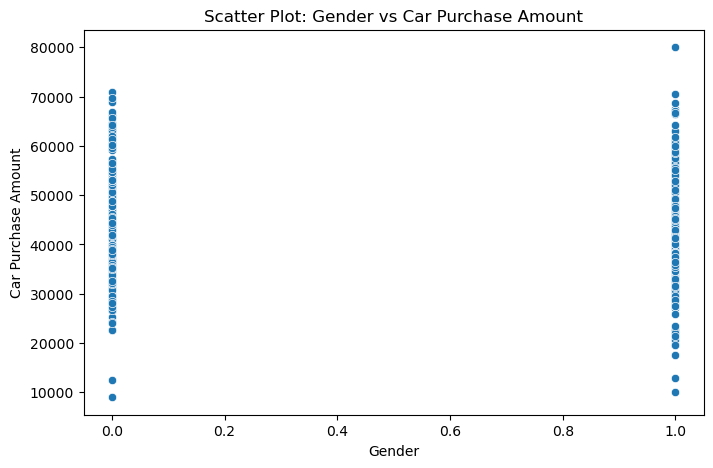

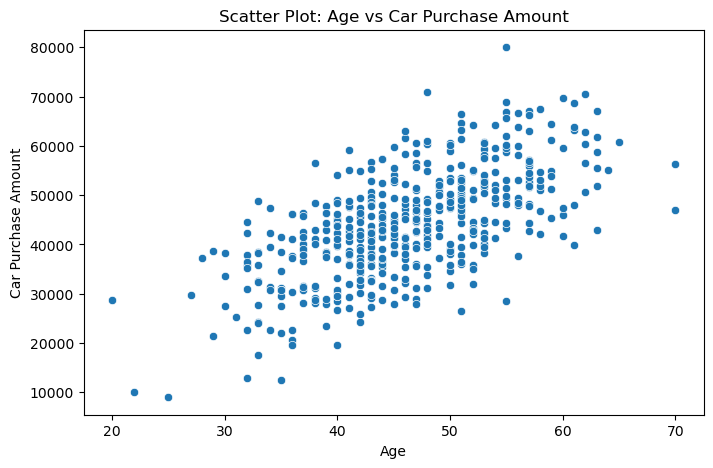

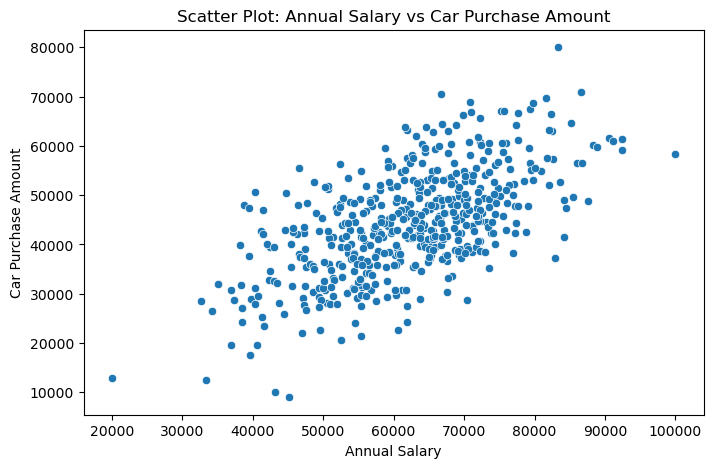

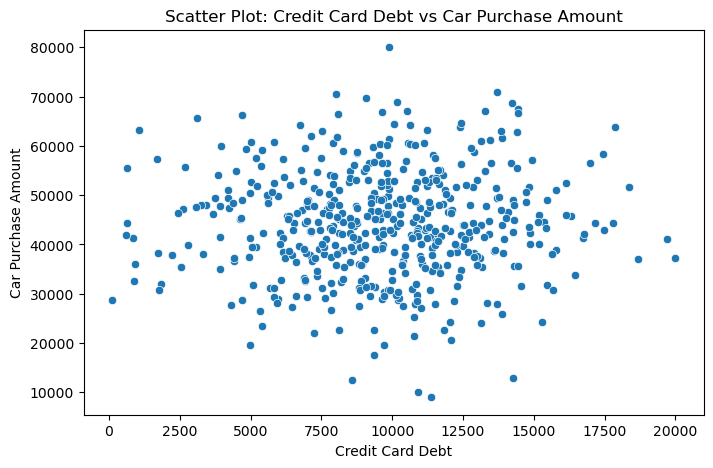

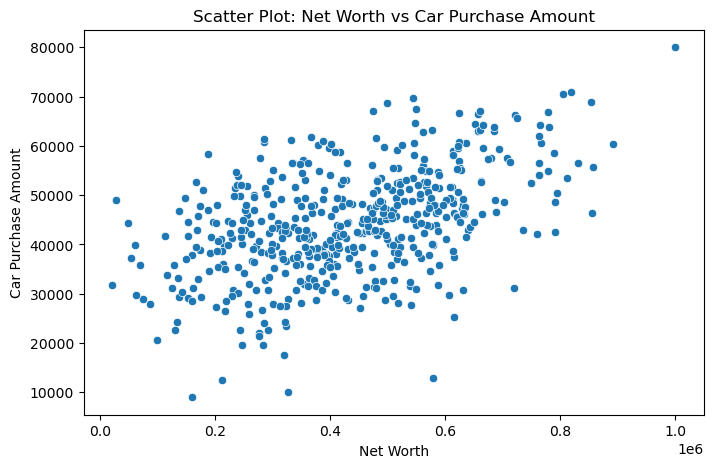

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot features vs target
columns = ['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']
target = 'Car Purchase Amount'
for column in columns:
    plt.figure(figsize=(8, 5))
    # Check if the column is categorical
    if pd.api.types.is_numeric_dtype(df[column]):
        # Scatter plot for numerical features
        sns.scatterplot(data=df, x=column, y=target)
        plt.title(f'Scatter Plot: {column} vs {target}')
                
    plt.xlabel(column)
    plt.ylabel(target)        
    plt.show()

## Preprocessing

Preprocessing for this research was quite straightforward. We can observe below that there are no missing values in any columns, and a dive into the values given shows no sign of error values such as '?' or 'Unknown'. We also observe zero duplicate entries.

In [8]:
# Print null value counts
print(df.isnull().sum())
print()

# Print unique value counts
columns = ['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']
for column in columns:
    print(df[column].value_counts())

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

Customer Name
Seth                    2
Walter                  2
Martina Avila           1
Sexton, Shaeleigh H.    1
Holloway, Brennan Q.    1
                       ..
Holmes Irwin            1
Hector Price            1
Sebastian Marks         1
Marvin Garner           1
Marla                   1
Name: count, Length: 498, dtype: int64
Customer e-mail
cubilia.Curae.Phasellus@quisaccumsanconvallis.edu    1
mi.eleifend.egestas@cursuset.net                     1
ut@Etiamvestibulum.ca                                1
nunc.sed.pede@Quisqueporttitor.net                   1
Cras.eu@vitaevelitegestas.net                        1
                                                    ..
Nunc.sed.orci@Namligulaelit.net                      1
Aliquam.nisl@semegetm

In [9]:
# Print number of duplicated rows
df.duplicated().sum()

0

As mentioned earlier, the <b>Country</b> column features only one unique value, 'USA'. This will not change our models in anyway. On top of that, because <b>Customer Name</b> and <b>Customer e-mail</b> are meant for identification, they as well will not provide any insight in modeling. Therefore, these three features will be removed.

In [10]:
# Drop unnecessary columns
df_clean = df.drop(columns = ['Customer Name', 'Customer e-mail', 'Country'])
df_clean

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59,49811.99062,14013.034510,337826.6382,45442.15353


Finally, our float variables <b>Annual Salary</b>, <b>Credit Card Debt</b>, <b>Net Worth</b>, and our target variable <b>Car Purchase Amount</b> will be simplified to include only two decimal points, which is standard when dealing with monetary values.

In [11]:
# Round float values to 2 decimal places
df_clean['Annual Salary'] = df_clean['Annual Salary'].apply(lambda x: round(x, 2))
df_clean['Credit Card Debt'] = df_clean['Credit Card Debt'].apply(lambda x: round(x, 2))
df_clean['Net Worth'] = df_clean['Net Worth'].apply(lambda x: round(x, 2))
df_clean['Car Purchase Amount'] = df_clean['Car Purchase Amount'].apply(lambda x: round(x, 2))
df_clean

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09,11609.38,238961.25,35321.46
1,0,41,66646.89,9572.96,530973.91,45115.53
2,1,43,53798.55,11160.36,638467.18,42925.71
3,1,58,79370.04,14426.16,548599.05,67422.36
4,1,57,59729.15,5358.71,560304.07,55915.46
...,...,...,...,...,...,...
495,0,41,71942.40,6995.90,541670.10,48901.44
496,1,38,56039.50,12301.46,360419.10,31491.41
497,1,54,68888.78,10611.61,764531.32,64147.29
498,1,59,49811.99,14013.03,337826.64,45442.15


And this concludes our data cleaning and preprocessing, which means its time to move on to...

## Modeling

### Linear Regression Model

For our first model, we used a simple Linear Regression model. The data was split into training and testing groups, with 80% designated for training. Below you can observe that the training data features 400 entries, while the testing data has 100 entries. Next our model is created using the LinearRegression function from the sklearn package. Predictions are then made based on the testing data and compared to the actual results. 

In [12]:
from sklearn.model_selection import train_test_split

# Split data into features and target
X = df_clean.drop(columns = ['Car Purchase Amount'])
y = df_clean['Car Purchase Amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Print shapes of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 5), (100, 5), (400,), (100,))

Mean squared error: 62253.939294672695
Root mean squared error: 249.50739326655773


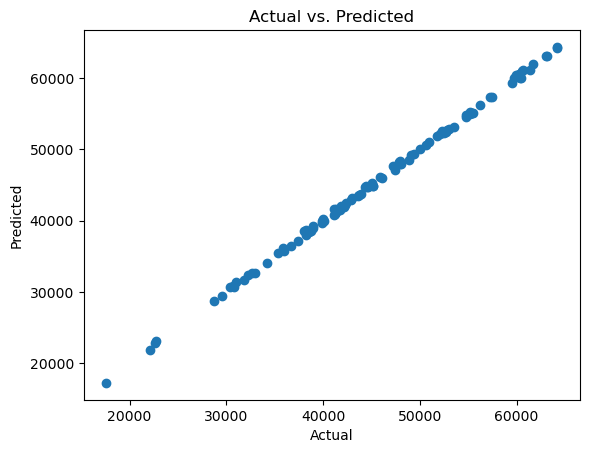

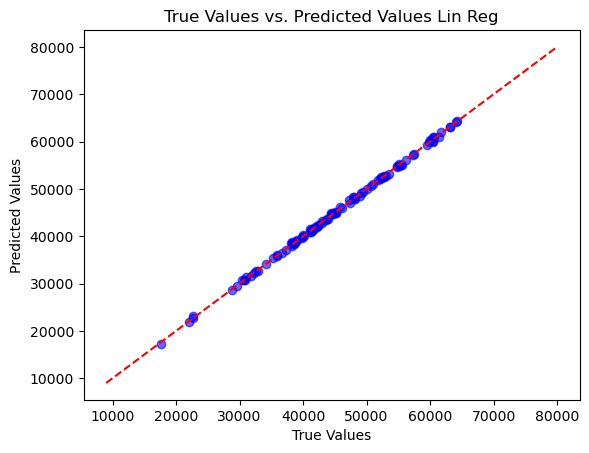

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression().fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Calculate root mean squared error
rmse = mse ** 0.5
print('Root mean squared error:', rmse)

# Print graph
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# predicted plot
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('True Values vs. Predicted Values Lin Reg')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

To test the model's capabilities, we find the Mean Squared Error and Root Mean Squared Error (MSE and RMSE). The RMSE tells us the average distance between the predicted target value and actual target value. Just above the graphs, we see that this model has an RMSE of roughly 250. Considering our dataset deals with numbers in the tens of thousands, this is a strong first model. The first graph above shows a scatter plot comparing the prediction and actual values and the second graph does the same, but with a dashed line representing X = Y, or perfect predictions. Any plot points above the dashed line mean the model predicted the target to be larger than it actually was, while below the dashed line means the model predicted the target to be smaller than its actual value. We can observe that the data rests very close to this line, suggesting the model is strong at predicting, though this could be attributed to the large scale of numbers.